# 回帰のための人工データを作成
- [有名なテストfunction](https://www.sfu.ca/~ssurjano/optimization.html)
    - [BRANIN FUNCTION](https://www.sfu.ca/~ssurjano/branin.html)
- 作成したデータは 'dump/data_df.pkl'に保存される

In [1]:
from IPython.core.display import display, Math, Latex

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.animation as animation


import numpy as np
from numpy.random import seed
import pandas as pd
import pickle
from  sympy import *
from sympy.plotting import plot, plot3d
init_printing()
%matplotlib notebook
%matplotlib inline

## ブラックボックス関数にノイズを加えるチュートリアル
- $y = sin(x) + \epsilon, \epsilon$ ~ $N(0, 0.15) $

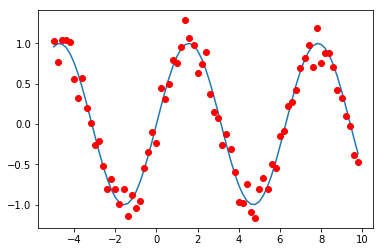

In [2]:
_X = np.arange(-5, 10, 0.2)
true_values = np.array([np.sin(_x) for _x in _X])
plt.plot(_X, true_values)
noise = np.random.normal(0.0, 0.15, len(_X))
y = true_values + noise
plt.plot(_X, y, 'ro')

## Branin function
$f(x1, x2) = a(x2 - b*x1^2 + c*x1 - r)^2 + s*(1-t)*cos(x1) + s$

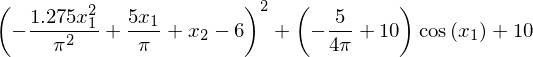

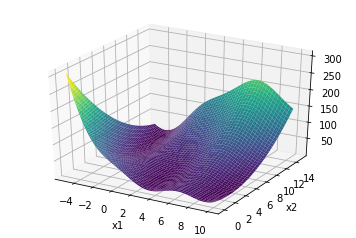

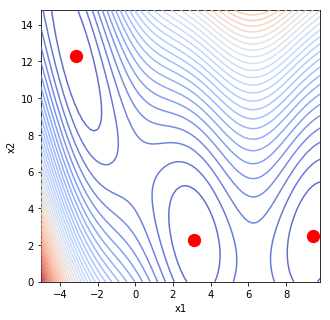

In [3]:
x1, x2, x3 = symbols('x1:%d' % (3+1))

a = 1
b = 5.1 / (4*(pi**2))
c = 5 / pi
r = 6
s = 10
t = 1 / (8*pi)

f_expr =  a*(x2 - b*x1**2 + c*x1 - r)**2 + s*(1-t)*cos(x1) + s
display(f_expr)

plot3d(f_expr, (x1, -5, 10), (x2, 0, 15), xlabel='x1', ylabel='x2')


f = lambdify((x1, x2), f_expr, "numpy")

x = np.arange(-5, 10, 0.2)
y = np.arange(0, 15, 0.2)
X, Y =  np.meshgrid(x, y)

Z = np.array([f(*x) for x in np.array([X.flatten(), Y.flatten()]).T ]).reshape(X.shape)

plt.figure(figsize=(5,5))
plt.contour(X, Y, Z, 50, zorder=1000, alpha=0.8, shading='gouraud', cmap=plt.cm.coolwarm)


data = np.array([(float(-pi.evalf()), 12.275), (float(pi.evalf()), 2.275), (9.42478, 2.475) ])
score = [f(*x) for x in data]
plt.scatter(data[:,0], data[:, 1], s=150, c='red', marker="o")
plt.xlabel('x1')
plt.ylabel('x2')

In [4]:
seed(2345)
sample_num = 100

_x1 = np.random.uniform(-5, 10, size=sample_num)
_x2 = np.random.uniform(0, 15, size=sample_num)
_X = np.array([_x1, _x2]).T

true_values = np.array([f(*_x) for _x in _X])
noise = np.random.normal(loc=0.0, scale=0.15, size=len(true_values))
y = true_values + noise

df = pd.DataFrame(list(zip(_X, y)))
df.columns = ['X', 'y']
df.to_pickle('dump/data_df.pkl')

In [5]:
df = pd.read_pickle('dump/data_df.pkl')
df[:2]

,X,y
0,"[4.90966463835, 0.00116373935737]",13.576125
1,"[1.20400978032, 7.70527110964]",25.460308


## Sympyで定義した式とsymbolを保存

In [6]:
class SpFunc():# sympy function
    
    def __init__(self, f_expr, theta):
        """
        f_expr: sympy function expression
        theta: mutable object of fuction arguments
        """
        self.f_expr = f_expr
        self.theta = theta
    
    def to_pickle(self, filepath):
        if self.f_expr is None or self.theta is None:
            raise TypeError()         
        with open(filepath, 'wb') as file:
            pickle.dump(self, file)
            
    @classmethod    
    def read_pickle(cls, filepath):
        """
        Return:
            SpFunc object
        """
        with open(filepath, 'rb') as file:
            obj = pickle.load(file)
        return obj
    
        
        

In [7]:
sf = SpFunc(f_expr, (x1, x2))
sf.to_pickle('dump/sf.pkl')

In [8]:
sf = SpFunc.read_pickle('dump/sf.pkl')

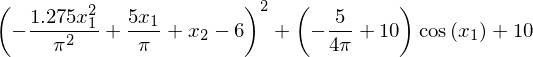

In [9]:
display(sf.f_expr)
display(sf.theta)